In [1]:
# Import some standard python analysis and plotting packages
import numpy as np
import math as m
import scipy.constants
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})


def getCyclotronRadius(B,T,theta):
    """Function to return the cyclotron radius for an electron with kinetic energy T and 
    angle theta with respect to in a magentic field B
    Args:
        B: The magentic field (Tesla)
        T: The kinetic energy (keV)
        theta: angle with respect to magnetic field direction (radians)
        
    Returns:
        The cylotron radius, r_c, in cm
    """
    
    m_e = 511.0; # keV/c^2
    total_E = T + m_e
    
    p = np.sqrt(total_E**2 - m_e**2)

    pT = p*np.sin(theta)
    
    r_c = pT*(1.0E05/(scipy.constants.c))/(B)
    
    return r_c


def getElectronSpeed(T):
    """Function to return the speed of an electron with kinetic energy T
    Args:
        T: The kinetic energy (keV)
        
    Returns:
        The speed, in units of the speed of light
    """
    
    m_e = 511.0; # keV/c^2
    total_E = T + m_e
    
    p = np.sqrt(total_E**2 - m_e**2)

    beta = p/total_E;
    
    return beta


print("r_c :",getCyclotronRadius(1.0,18.6,m.pi/2.)) 
print("v :",getElectronSpeed(18.6))
print("linear distance in 20us :",getElectronSpeed(18.6)*3.0E08*20.0E-06)


r_c : 0.04640637871987728
v : 0.26269415300813637
linear distance in 20us : 1576.1649180488182


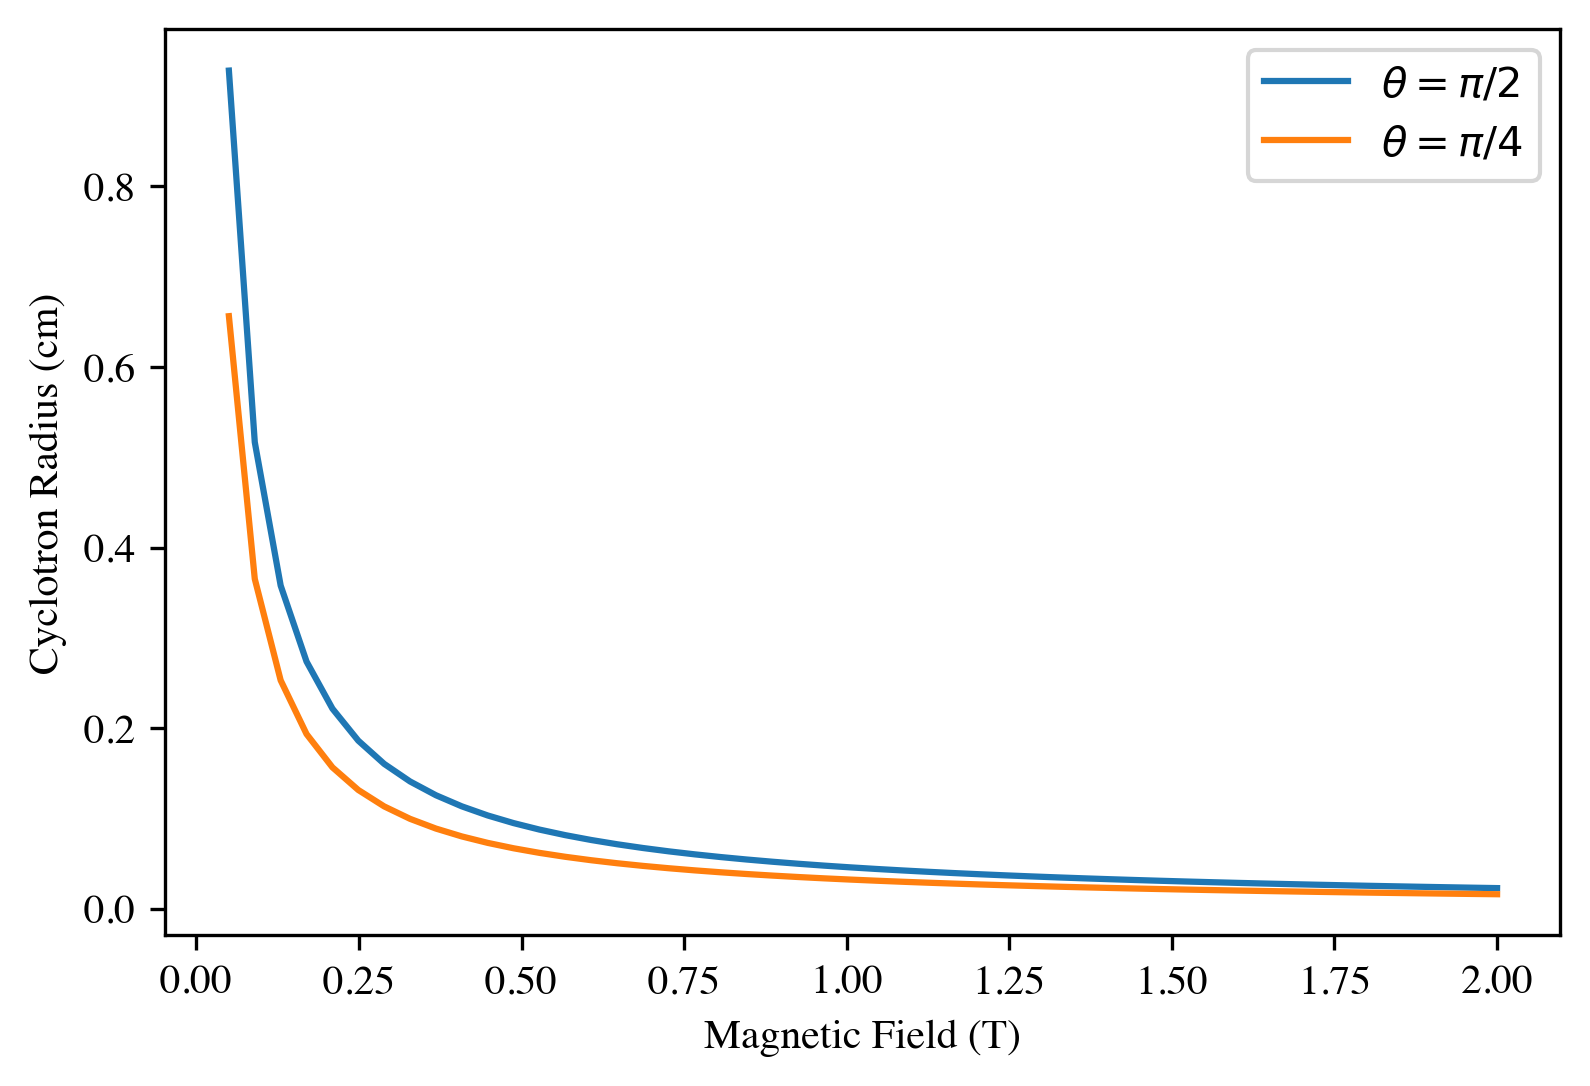

In [2]:
fig,ax = plt.subplots()
numBs=50
bArray=np.linspace(0.05,2,numBs)
ax.plot(bArray,getCyclotronRadius(bArray,18.6,m.pi/2.),label=r"$\theta=\pi/2$")
ax.plot(bArray,getCyclotronRadius(bArray,18.6,m.pi/4.),label=r"$\theta=\pi/4$")
ax.set_xlabel("Magnetic Field (T)")
ax.set_ylabel("Cyclotron Radius (cm)")
ax.legend()


In [8]:
import math
def relativisticAngle(theta,gamma):
    beta=np.sqrt((gamma**2 -1)/(gamma**2))
    tanT = np.sin(theta)/ (gamma * (np.cos(theta) + beta))
    return tanT
    

Text(0, 0.5, 'Lab Frame Angle (Degrees)')

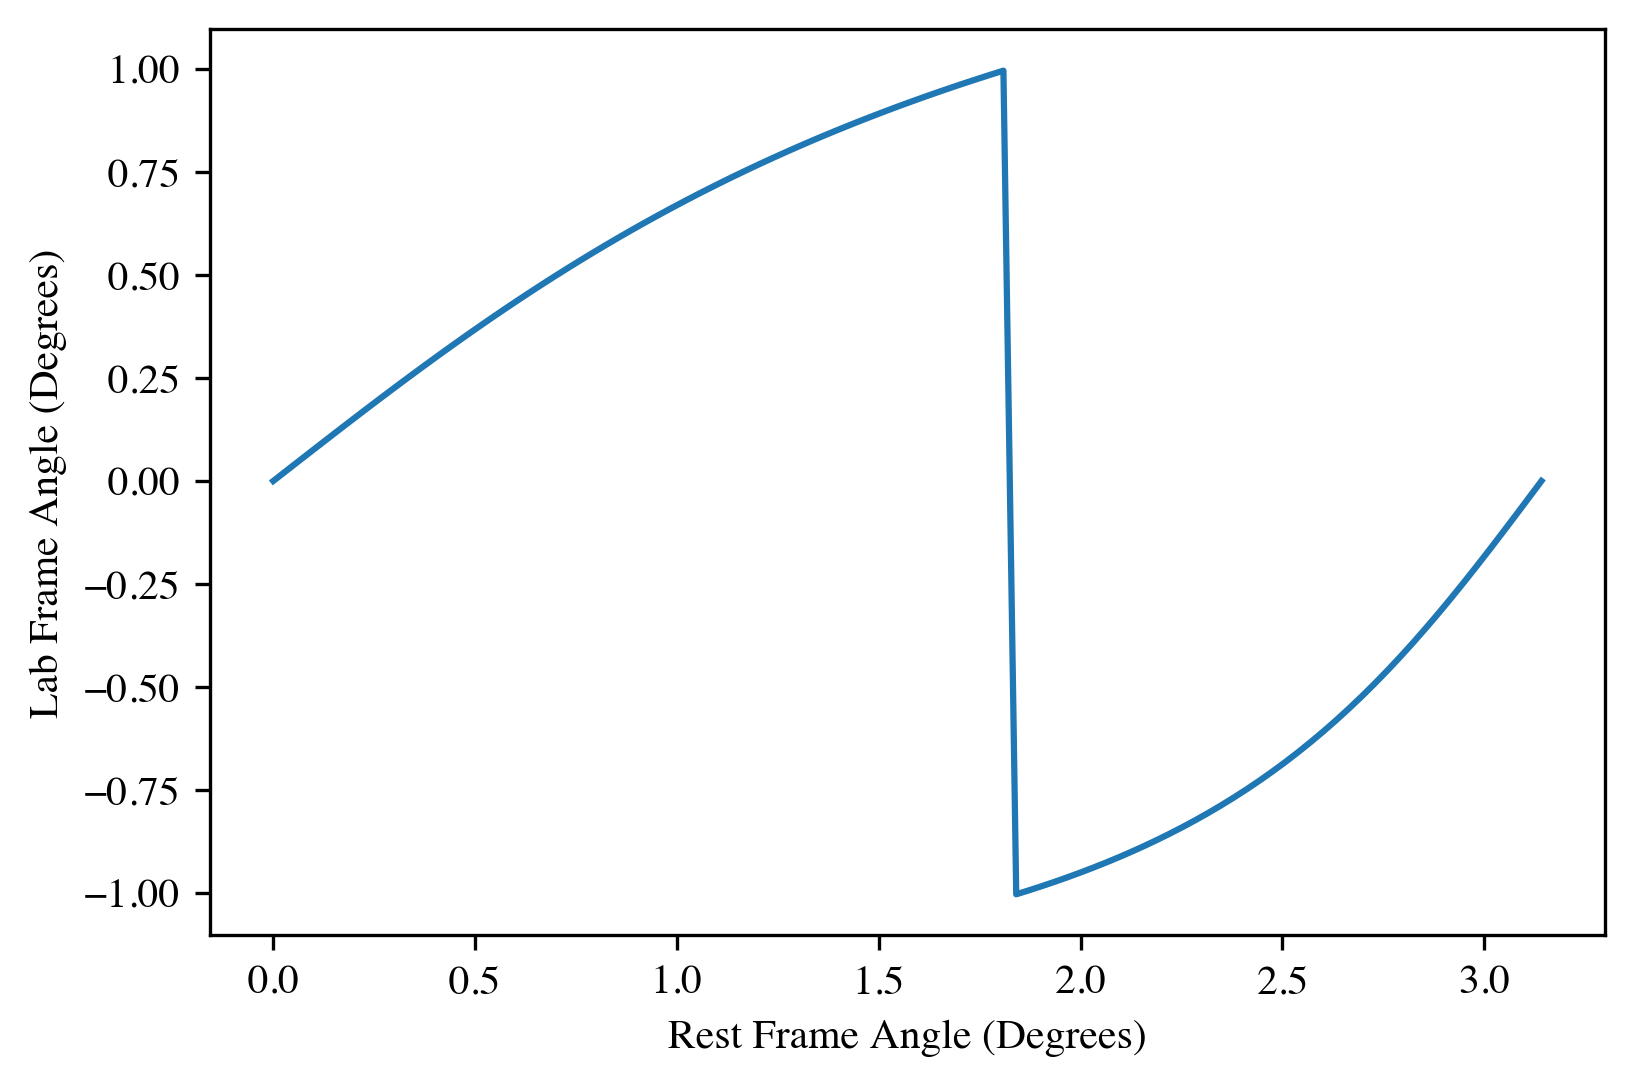

In [29]:
gamma=1.036399
#gamma=10
tArray=np.linspace(0,math.pi,100)
#tArray=tArray[0:-1]
fig,ax = plt.subplots()
ax.plot(tArray,np.arctan(relativisticAngle(tArray,gamma)))
ax.set_xlabel("Rest Frame Angle (Degrees)")
ax.set_ylabel("Lab Frame Angle (Degrees)")

Text(0, 0.5, 'Lab Frame Angle (Degrees)')

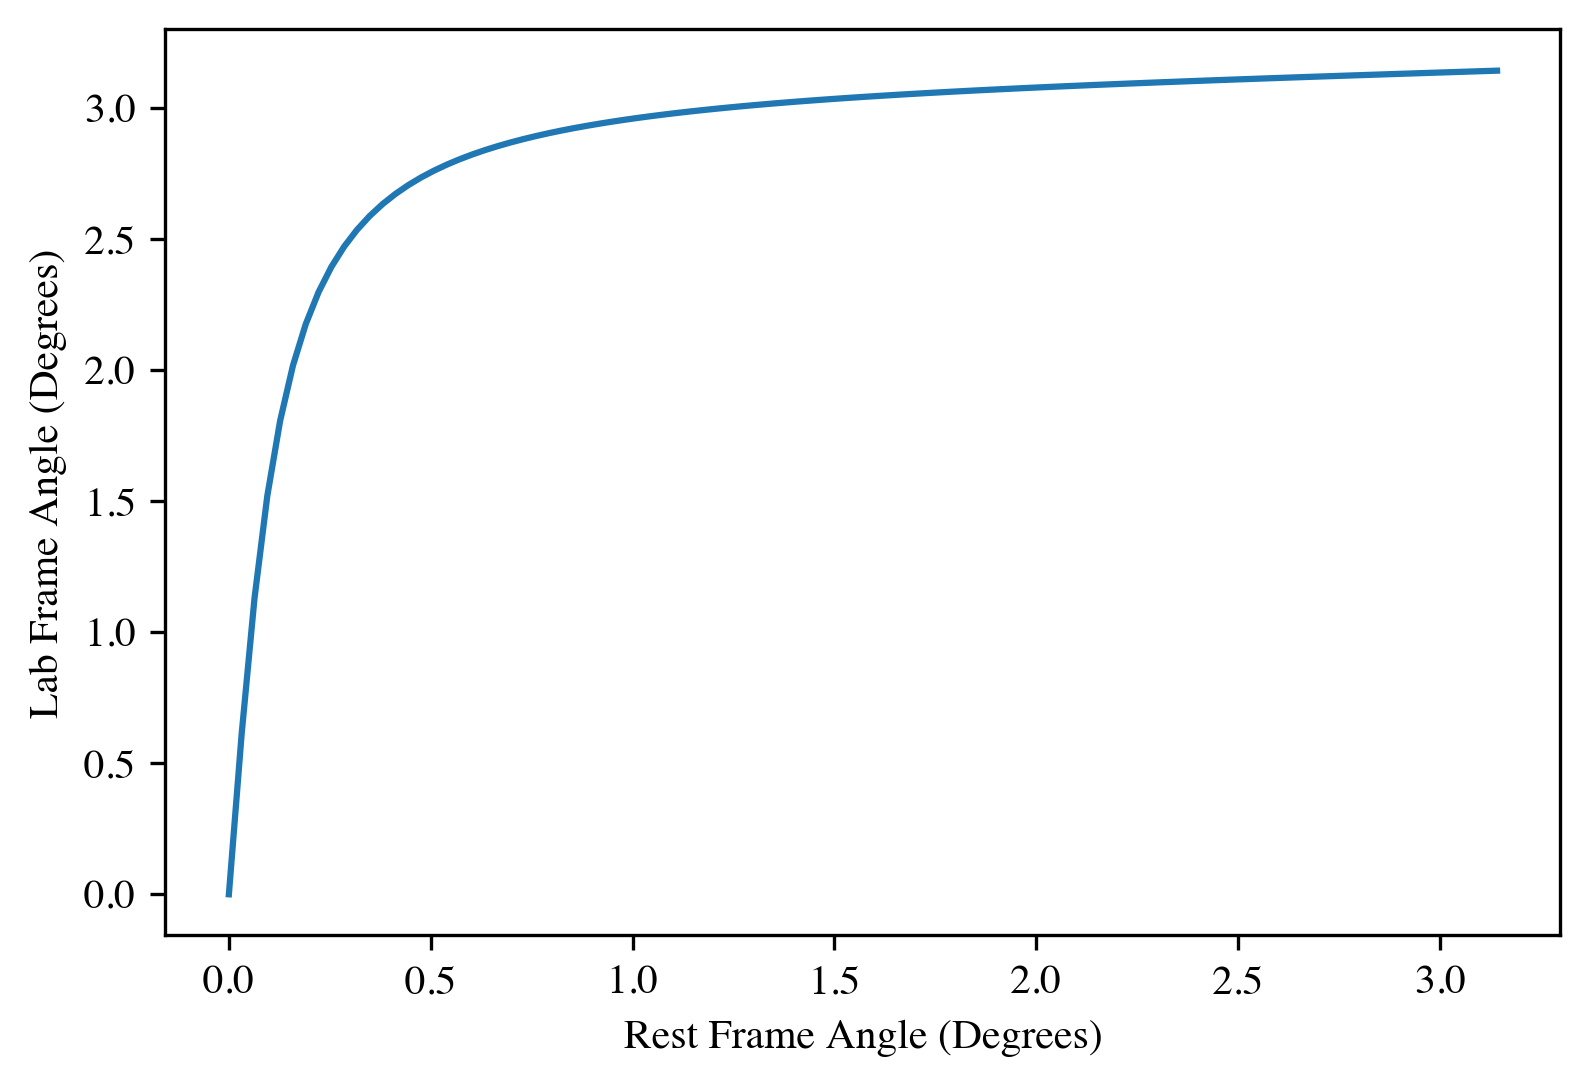

In [39]:
import math
def relativisticCosTheta(theta,gamma):
    beta=np.sqrt((gamma**2 -1)/(gamma**2))
    cosT=(np.cos(theta)-beta)/(1-beta*np.cos(theta))
    return cosT


def relativisticSinTheta(theta,gamma):
    beta=np.sqrt((gamma**2 -1)/(gamma**2))
    cosT=(np.sin(theta))/(gamma*(1+beta*np.cos(theta)))
    return cosT

gamma=1.036399
gamma=10
tArray=np.linspace(0,math.pi,100)
#tArray=tArray[0:-1]
fig,ax = plt.subplots()
ax.plot(tArray,np.arccos(relativisticCosTheta(tArray,gamma)))
ax.set_xlabel("Rest Frame Angle (Degrees)")
ax.set_ylabel("Lab Frame Angle (Degrees)")